# Elimination Algorithm

In this exercise, we will be experimenting with the Multi-armed bandit problem with the Elimination algorithm described in chapter 6 in the textbook.

## Setup

Consider an unstructured bandit problem. Suppose that we have $k$ arms, each with a random reward at time $t$ given by $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t]$ is drawn from an i.i.d. Gaussian distribution whose variance is $0.01$. Note that we only require $\epsilon[t]$ to be sub-Gaussian for the analysis to go through.

The following code should be implemented to capture this setup.

For references to the algorithms, please see:

https://docs.google.com/document/d/1r6jXNd1DD9o8v4q4XqxShRXWYdhtLMjEXWDzuv0T6LU/edit

**Reference:** Bandit Algorithms, T. Lattimore and C. Szepesvari, Cambridge University Press, 2020.

# Reward function
Question: Implement the reward function described in the setup. Specifically, given a $k$- dimensional vector 'avg', return $k$- dimensional vector 'rew' such that $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t] \sim \mathcal{N}(0,0.01 \times I)$ where $I$ is the identity matrix of size $k \times k$.

In [ ]:
def get_reward(avg):
  ## Your code here
  k = avg.size
  eps = np.random.normal(0, 0.01, k)
  rew = avg + eps
  return rew

## Algorithm review


Recall there are three parameters of interest in the Elimination algoritm: $(n, k, m_l),$ where $n$ is the time horizon, $k$ is the number of arms, and $m_l$ is an algorithm parameter. Please refer to the text book (Algorithm 2 page 98) for details.

The parameter to set: $m_l$ which is the number of times arm $i \in A_l$ is chosen during epoch $l$ where $A_l$ is the active set.

## Goal of this exercise

Implement the following using the template provided below. Please use the variable names suggested in the comments.

1. Basic Elimination algorithm implementation
2. Plot the expected cumulative regret of the Elimination algorithm vs. horizon ($n$).
3. The cumulative regret is expected to be logarithmic against the horizon. To check that this is case, plot the logarithm of the expected cumulative regret of the Elimination algorithm vs. horizon ($n$). (Hint: use the semilogx function in matplotlib.pyplot)

# Import Dependencies

In [ ]:
import numpy as np
import math
import pickle
import random
import matplotlib.pyplot as plt

##Elimination algorithm

Question:

Implement Elimination algorithm using the skeleton below. The initialization part is done. Fill out the rest of the skeleton.

In [ ]:
class Elimination():
  def __init__(self, avg, num_iter ): ## Initialization

    self.means = avg
    self.num_iter = num_iter
    self.num_arms = avg.size
    self.best_arm = np.argmax(avg)
    self.time = 0.0
    self.time2 = 0.0
    self.A = np.arange(self.num_arms)
    self.cum_reg = [0]
    self.m = np.ceil( 2 ** (2 * self.time) * np.log(max(np.exp(1), self.num_arms * self.num_iter * 2 ** (-2 * self.time))))
    self.restart()
    return None

    ## variable names (most are self explanatory)
    ## self.num_arms is the number of arms (k)
    ## self.means[arm] is the vector of true means of the arms
    ## self.time is the current time index: 1,....,num_iterations (this is t in the description at the top of this page)
    ## self.best_arm is the best arm given the true mean rewards
    ## self.cum_reg is the cumulative regret
    ## self.emp_means[arm] is the vector of empirical means of arms computed using the samples from epoch l
    ## self.num_pulls[arm] is the vector of number of times that arm k has been pulled during epoch l
    ## self.A is the active set in epoch l
    ## self.time2 is the time index in epoch l i.e: it goes from 1,..., m_l * size(self.A)
    ## self.m is the number of times to pull each arm in the active set in epoch l


  def restart(self): ## Restart the algorithm: Reset self.time2 to zero (done)
                     ## Set the values of the empirical means and number of pulls to zero.
    self.time2 = 0.0
    ## Your code here
    self.emp_means = np.zeros(self.num_arms)
    self.num_pulls = np.zeros(self.num_arms)

    return None

  def get_best_arm(self): ## For each time index in epoch l, find the best arm according to e-greedy ????
                          ## Hint: this is similar to ETC: use step 4 in algorithm 2 in the textbook
    ## Your code here
    rnd_ = random.uniform(0, 1)
    if rnd_ < self.eps:
      arm = random.randint(0, self.num_arms - 1)
    else:
      arm = np.argmax(self.emp_means)
    return arm

  def update_stats(self, rew, arm): ## Update the empirical means, the number of pulls, and increment self.time2
    ## Your code here
    self.emp_means[arm] = (self.emp_means[arm] * self.num_pulls[arm] + rew) / (self.num_pulls[arm] + 1)
    self.num_pulls[arm] += 1
    self.time2 += 1
    return None

  def update_elim(self): ## Update the active set
        self.m = np.ceil( 2 ** (2 * self.time) * np.log(max(np.exp(1), self.num_arms * self.num_iter * 2 ** (-2 * self.time))) )
        ## Your code here
        tmp = []
        for arm in self.A:
          if (self.emp_means[arm] + 2**(-self.time)) >= np.max(self.emp_means[self.A]):
            tmp.append(arm)
        self.A = np.array(tmp)
        return None

  def update_reg(self,rew_vec,arm): ## Update the cumulative regret
    ## Your code here
    self.cum_reg.append(self.cum_reg[-1] + rew_vec[self.best_arm] - rew_vec[arm])
    return None

  def iterate(self, rew_vec): ## Iterate the algorithm
    ## Your code here
    arm = self.A[int(self.time2 % len(self.A))]
    self.update_stats(rew_vec[arm], arm)
    self.update_reg(rew_vec, arm)
    return None


# Experiment Function

The following code runs the Elimination algorithm for multiple instances. In the code below, num_inst is the number of instances, and num_iter is the time horizon.

In [ ]:
def run_algo(avg, num_iter, num_inst):

    reg = np.zeros((num_inst, num_iter))

    for k in range(num_inst):

        algo = Elimination(avg, num_iter)

        if (k+1)%50 == 0:
            print('Instance number = ', k+1)

        while len(algo.cum_reg) <= num_iter:
            # print(len(algo.cum_reg))

            if len(algo.cum_reg) >= num_iter:
                break
            # print(algo.A)
            for t in range(int(algo.m) * algo.A.size): ##local counter

              if len(algo.cum_reg) >= num_iter:
                break

              else:
                rew_vec = get_reward(avg)

                algo.iterate(rew_vec)
            # print(algo.emp_means)
            algo.update_elim()
            algo.restart()

            algo.time += 1 ##so time is actually l!

        reg[k,:]= np.asarray(algo.cum_reg)

    return reg

# Initializations

Use the following to initialize your algorithm. The value of $k$ is implicitly set to $5$ in the initialization below. (This vector contains the actual mean rewards).

In [ ]:
avg = np.asarray([0.8, 0.88, 0.5, 0.7, 0.65])
num_iter,num_inst = int(1500),250

# Run Experiment

In [ ]:
reg = run_algo(avg, num_iter, num_inst)

Instance number =  50
Instance number =  100
Instance number =  150
Instance number =  200
Instance number =  250


## Plotting the Results

Questions:

1 - Compute the average regret over the number of instances and plot it against the horizon. Label the x-axis as time, and the y-axis as Cumulative Regret. Add a caption labeling this as 'Cumulative Regret with Eliminiation Algorithm.

2 - Use the semilogx function in matplotlib to check that the regret is logarithmic against horizon.

Text(0.5, 1.0, 'Cumulative Regret with Eliminiation Algorithm')

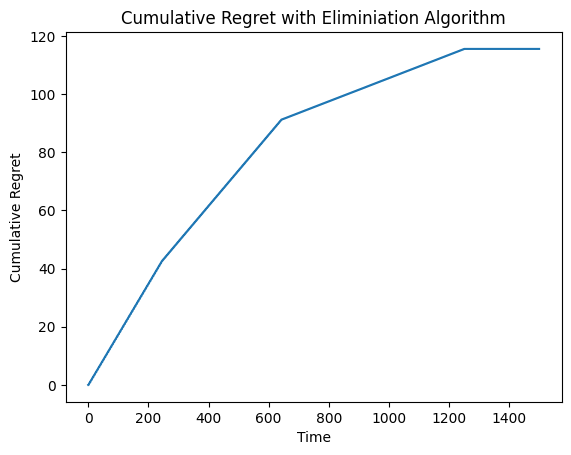

In [ ]:
## Your code here
reg_mean = np.mean(reg, axis=0)
plt.plot(reg_mean)
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with Eliminiation Algorithm')

Text(0, 0.5, 'Cumulative Regret with Eliminiation Algorithm')

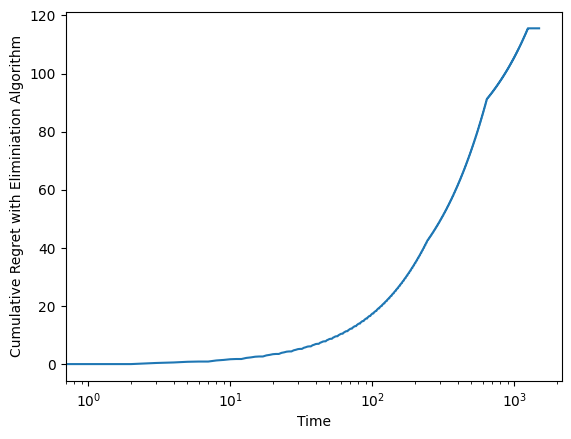

In [ ]:
## Your code here
reg_mean = np.mean(reg, axis=0)
plt.semilogx(reg_mean)
plt.xlabel('Time')
plt.ylabel('Cumulative Regret with Eliminiation Algorithm')


**ACKNOWLEDGEMENT:**   This exercise is provided by courtesy of Prof. Sanjay Shakkottai (UT Austin).  Thanks to Hassan Hmedi (UT Austin) for developing this exercise and Nihal Sharma (UT Austin) for his help in the development.  The instructor gratefully acknowledges their contribution.